<a href="https://colab.research.google.com/github/EmmanuelABonsu/CE888/blob/main/src/project/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import Libraries
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [ ]:
# Define path to test data 
test_path = "../input/fire-detection-data/Test/Test"

In [ ]:
untuned_model = keras.models.load_model('../input/forest-fires-classification/Xception_model.h5')

In [ ]:
# Load Fine Tuned Model
fine_tuned_model = keras.models.load_model('../input/fire-detection-data/fine_tuned_xception_model.h5')

In [ ]:
# Initialize tess data pipeline
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(254, 254),
        shuffle = False,
        class_mode='binary',
        batch_size=8)

Found 8617 images belonging to 2 classes.


In [ ]:
# Evaluate Untuned model 
untuned_model.evaluate(test_generator)

1078/1078 [==============================] - 57s 52ms/step - loss: 0.7594 - acc: 0.7002


[0.7594279646873474, 0.7002437114715576]

In [ ]:
# Generate predictions on test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions_for_untuned_model = untuned_model.predict(test_generator, steps=test_steps_per_epoch)


In [ ]:
# Converting predionts into model labels [0, 1]
pred_list = list(predictions_for_untuned_model)
predicted_classes_untuned_model = [1 if entry > 0.5 else 0 for entry in pred_list]

In [ ]:
# Extracting true classes,[0, 1] from test generator 
true_classes = test_generator.classes

<AxesSubplot:>

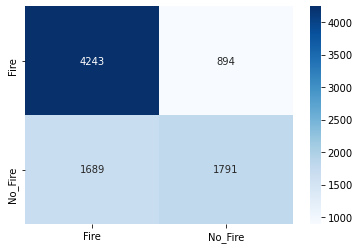

In [ ]:
# Plotting Confusion Matrix
cm=confusion_matrix(true_classes,predicted_classes_untuned_model)
sn.heatmap(cm,annot=True,cmap='Blues', fmt='g',xticklabels=['Fire', 'No_Fire'], yticklabels=['Fire', 'No_Fire']) #Fire --> 0 and No_Fire --> 1

In [ ]:
# Evaluate Fine tuned model
fine_tuned_model.evaluate(test_generator)

1078/1078 [==============================] - 59s 54ms/step - loss: 0.7988 - acc: 0.8681


[0.7987954020500183, 0.8680515289306641]

In [ ]:
# Predicions for fine tuned model
predictions_for_fine_tuned_model = fine_tuned_model.predict(test_generator, steps=test_steps_per_epoch)


In [ ]:
# Converting predionts into model labels [0, 1]
pred_list = list(predictions_for_fine_tuned_model)
predicted_classes_fine_tuned_model = [1 if entry > 0.5 else 0 for entry in pred_list]

<AxesSubplot:>

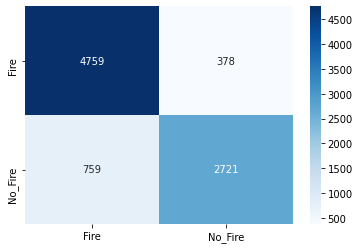

In [ ]:
# Plotting Confusion  for Fine Tuned Matrix
cm=confusion_matrix(true_classes,predicted_classes_fine_tuned_model)
sn.heatmap(cm,annot=True,cmap='Blues', fmt='g',xticklabels=['Fire', 'No_Fire'], yticklabels=['Fire', 'No_Fire'])